In [2]:
import GPUtil

# Get the list of available GPUs
gpus = GPUtil.getGPUs()

if not gpus:
    print("No GPU found")
else:
    for gpu in gpus:
        print(f"GPU ID: {gpu.id}")
        print(f"GPU Name: {gpu.name}")
        print(f"GPU Driver: {gpu.driver}")
        print(f"GPU Memory Total: {gpu.memoryTotal}MB")
        print(f"GPU Memory Free: {gpu.memoryFree}MB")
        print(f"GPU Memory Used: {gpu.memoryUsed}MB")
        print(f"GPU Load: {gpu.load*100}%")
        print(f"GPU Temperature: {gpu.temperature}°C")
        print(f"GPU UUID: {gpu.uuid}")
        print(f"GPU Vendor: {'NVIDIA' if 'NVIDIA' in gpu.name else 'Intel' if 'Intel' in gpu.name else 'Unknown'}")

import os
import tensorflow as tf

os.environ['CUDA_VISIBLE_DEVICES'] = str(gpu.id)
        

GPU ID: 0
GPU Name: NVIDIA GeForce RTX 4060 Laptop GPU
GPU Driver: 535.183.01
GPU Memory Total: 8188.0MB
GPU Memory Free: 1504.0MB
GPU Memory Used: 6435.0MB
GPU Load: 0.0%
GPU Temperature: 35.0°C
GPU UUID: GPU-d027e254-c422-a71b-2865-f06151eae1b8
GPU Vendor: NVIDIA


2024-08-27 02:14:23.697370: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-27 02:14:23.707276: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-27 02:14:23.718578: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-27 02:14:23.721895: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-27 02:14:23.730506: I tensorflow/core/platform/cpu_feature_guar

In [3]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from tensorflow.keras import utils as np_utils


# loading the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()


In [4]:
# import os
# # Create train and test directories if they don't exist
# train_dir = 'train'
# test_dir = 'test'
# os.makedirs(train_dir, exist_ok=True)
# os.makedirs(test_dir, exist_ok=True)

# # Save images to train directory
# for i in range(len(X_train)):
#     image_path = os.path.join(train_dir, f"{i}.png")
#     plt.imsave(image_path, X_train[i])

# # Save images to test directory
# for i in range(len(X_test)):
#     image_path = os.path.join(test_dir, f"{i}.png")
#     plt.imsave(image_path, X_test[i])

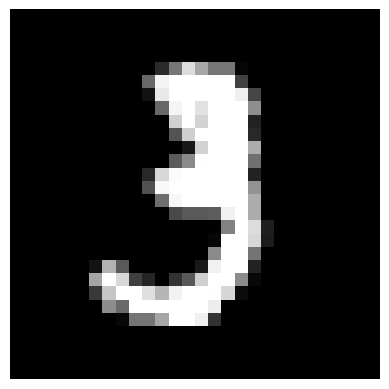

In [5]:
import matplotlib.pyplot as plt

plt.imshow(X_train[10].reshape(28, 28), cmap='gray')
plt.axis('off')
plt.show()


In [6]:
print("X_train shape", X_train.shape) # 60,000 samples, 28x28 pixels
print("y_train shape", y_train.shape) # 60,000 labels
print("X_test shape", X_test.shape) # 10,000 samples, 28x28 pixels
print("y_test shape", y_test.shape) # 10,000 labels

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


In [7]:
type(X_train)
X_train[0].shape

(28, 28)

In [8]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPool2D
from tensorflow.keras import utils as np_utils

In [11]:
# Flattening the images from the 28x28 pixels to 1D 787 pixels
# X_train = X_train.reshape(60000, 784)
# X_test = X_test.reshape(10000, 784)
# X_train = X_train.astype('float32')
# X_test = X_test.astype('float32')
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [12]:
# normalizing the data to help with the training
X_train /= 255
X_test /= 255

## Data Visualizing

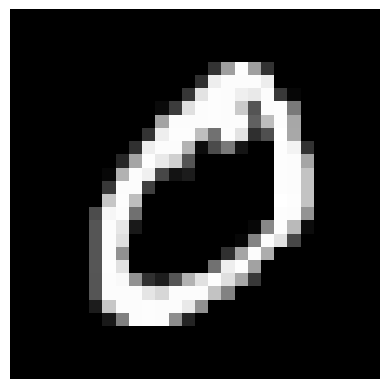

In [13]:
plt.imshow(X_train[1].reshape(28, 28), cmap='gray')
plt.axis('off')
plt.show()

In [14]:
y_train[1]

0

## Data Handling

In [15]:
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


![Screenshot from 2024-08-27 00-29-48.png](<attachment:Screenshot from 2024-08-27 00-29-48.png>)
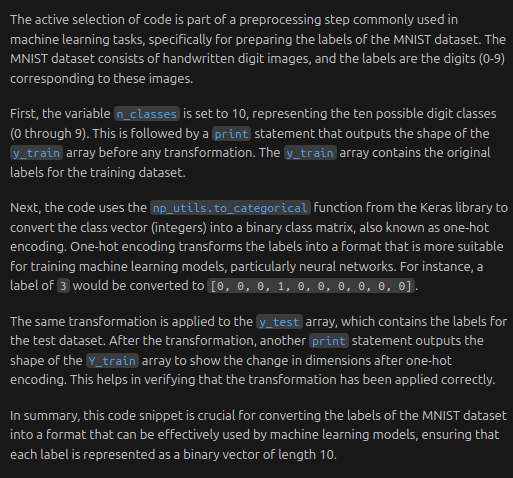

![Screenshot from 2024-08-27 00-30-11.png](<attachment:Screenshot from 2024-08-27 00-30-11.png>)
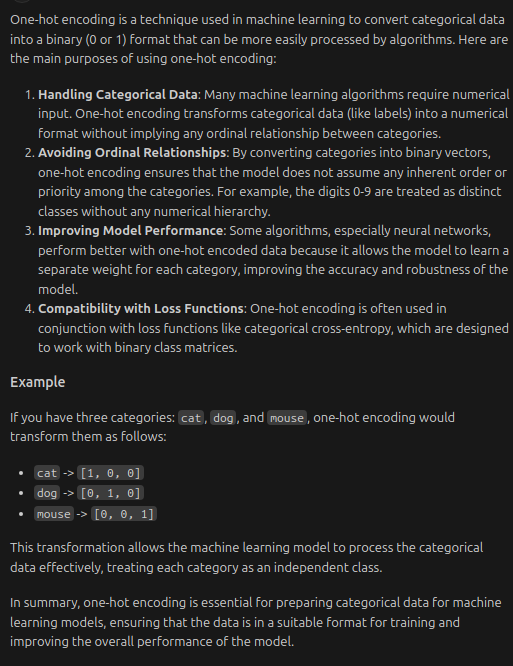

In [16]:
# building a linear stack of layers with the sequential model
model = tf.keras.Sequential()
# convolutional layer
model.add(tf.keras.layers.Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)))
model.add(tf.keras.layers.MaxPool2D(pool_size=(1,1)))
# flatten output of conv
model.add(tf.keras.layers.Flatten())
# hidden layer
model.add(tf.keras.layers.Dense(100, activation='relu'))
# output layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# training the model for 10 epochs
model.fit(X_train, Y_train, batch_size=128, epochs=15, validation_data=(X_test, Y_test))

/home/omar/.local/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1724714098.921415   10369 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1724714098.946723   10369 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1724714098.946893   10369 cuda_execu

Epoch 1/15


I0000 00:00:1724714100.236231   15233 service.cc:146] XLA service 0x7ff33c009c30 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1724714100.236252   15233 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2024-08-27 02:15:00.253013: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-08-27 02:15:00.332871: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907
2024-08-27 02:15:00.357502: W external/local_xla/xla/service/gpu/nvptx_compiler.cc:762] The NVIDIA driver's CUDA version is 12.2 which is older than the ptxas CUDA version (12.3.107). Because the driver is older than the ptxas version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward co

108/469 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7809 - loss: 0.7576

I0000 00:00:1724714101.743908   15233 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8879 - loss: 0.3856 - val_accuracy: 0.9775 - val_loss: 0.0721
Epoch 2/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9828 - loss: 0.0595 - val_accuracy: 0.9807 - val_loss: 0.0565
Epoch 3/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9905 - loss: 0.0323 - val_accuracy: 0.9835 - val_loss: 0.0508
Epoch 4/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9941 - loss: 0.0203 - val_accuracy: 0.9820 - val_loss: 0.0528
Epoch 5/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9962 - loss: 0.0138 - val_accuracy: 0.9860 - val_loss: 0.0459
Epoch 6/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9973 - loss: 0.0098 - val_accuracy: 0.9853 - val_loss: 0.0504
Epoch 7/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9984 - loss: 0.0067 - val_accuracy: 0.9794 - val_loss: 0.0781
Epoch 8/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9980 - loss: 0.0072 - val_accuracy: 0.9846 - val_

In [17]:
# Save the model as a pickle file
model.save('MNIST.keras')

# Deployment Test

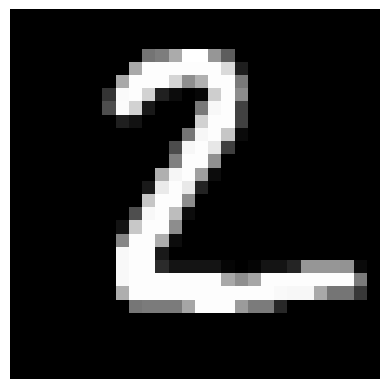

In [18]:
plt.imshow(X_test[1].reshape(28, 28), cmap='gray')
plt.axis('off')
plt.show()

In [19]:
y_test[1]

2

![Screenshot from 2024-08-27 01-13-35.png](<attachment:Screenshot from 2024-08-27 01-13-35.png>)
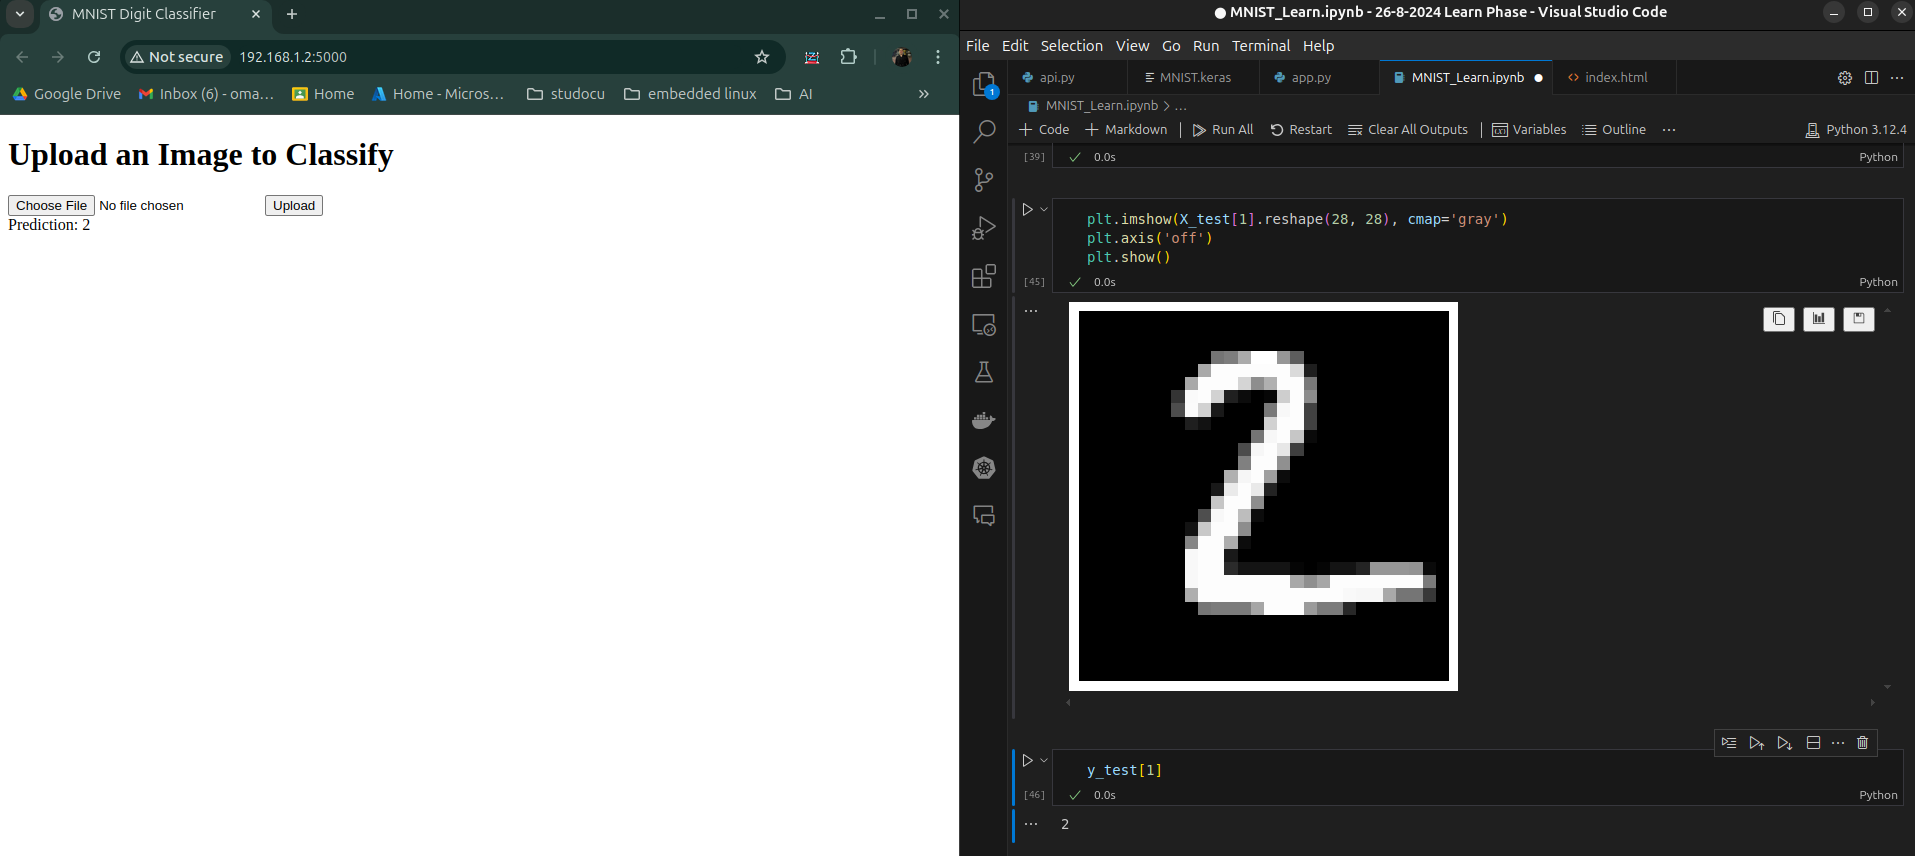